## Predicting Google Stock Prices

### Task 1: Importing Google Stock Data¶
Our first step is to get the information about the stock we're interested in. This information tells us how the stock has been doing over time. Let's take a look at the data and see what it tells us.

Load the data
1. Import Pandas and alias it as 'pd'.
2. Read the CSV file movies Google_stocks.csv into a Pandas DataFrame named 'stock_data'.
3. To import the 'Google_stocks.csv' file, which is located in the root path of the project, we should use the following path: './Google_stocks.csv'.
4. Inspecting the data by calling the variable 'stock_data'.

In [36]:
#Import Pandas
import pandas as pd
#Read in dataset (Google_stocks.csv)

#stock_data = pd.read_csv('please enter the file_path here')
stock_data.head(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


### Task 2: Checking for Missing Data¶
Once we've got the stock information, now, let's check if there's any missing data in our stock dataset. It's important to know if any information is missing because it could affect our analysis. Let's find out if there are any missing values.

1. Use the '.isna()' method on the DataFrame 'stock_data' to create a Boolean DataFrame marking null values.
2. Apply the '.sum()' method on this Boolean DataFrame to count null values column-wise.
3. Store the sum of null values in the variable 'sum_of_null'.

In [37]:
sumofnull = stock_data.isna().sum()

sumofnull

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

### Task 3: Identifying Duplicate Entries in Stock Data¶
After we've checked for missing data, now, let's see if there are any duplicate entries in our stock dataset. Duplicate entries can skew our analysis, so it's important to identify and remove them if necessary. Let's find out if there are any duplicates.

1. Use the '.duplicated()' method on the DataFrame 'stock_data' to create a Boolean Series marking duplicate rows as True and non-duplicate rows as False.
2. Apply the '.sum()' method on this Boolean Series to count the number of duplicate rows.
3. Store the count of duplicate rows in the variable 'duplicates'.

In [38]:
duplicates = stock_data.duplicated().sum()

duplicates

0

### Task 4: Checking Data Types in Stock Data¶
Next, let's review the data types of each column in our stock dataset. Understanding the data types helps us ensure that the data is properly interpreted and used in our analysis. Let's take a look at the data types.

1. Utilize the '.dtypes' attribute on the DataFrame 'stock_data' to acquire the data types of the columns.
2. Store the data type information in the variable 'datatype'.

In [39]:
datatype = stock_data.dtypes

datatype

symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

### Task 5: Preparing Time Series Data¶
Let's focus on the date column in our stock dataset. We'll convert the date column to a standard format and set it as the index. This makes it easier to work with time-series data. Let's adjust the date format and set it as the index.

1. Convert the 'date' column in the DataFrame 'stock_data' to a datetime format using 'pd.to_datetime()'. Then, format the datetime using the '.dt.strftime()' method to represent the date in 'YYYY-MM-DD' format.
2. Assign the 'date' column as the index of 'stock_data' using '.set_index('date')'. Sort the DataFrame by index using '.sort_index()'.
3. Create a copy of the modified DataFrame 'stock_data' named 'df'. Convert the index of 'df' to datetime format using 'pd.to_datetime(df.index)' for better time series manipulation.

In [40]:
# Convert 'date' column to datetime format and format it to 'YYYY-MM-DD'
stock_data['date'] = pd.to_datetime(stock_data['date']).dt.strftime('%Y-%m-%d')

# Set 'date' column as the index and sort DataFrame by index
stock_data.set_index('date', inplace=True)
stock_data.sort_index(inplace=True)

# Create a copy of the modified DataFrame named df
df = stock_data.copy()

# Convert the index of df to datetime format
df.index = pd.to_datetime(df.index)

# Now df is ready for time series manipulation
df

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2016-06-14,GOOG,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,GOOG,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,GOOG,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,GOOG,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,GOOG,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,GOOG,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,GOOG,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,GOOG,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


### Task 6: Removing Unnecessary Columns¶
After formatting the date data, now we streamline our dataset by removing some unnecessary columns. These columns don't provide essential information for our analysis, so it's best to get rid of them to simplify our dataset. Let's remove these columns and focus on what's important.

1. Use the '.drop()' method on DataFrame 'df' to remove specific columns like 'symbol', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', and 'splitFactor'.
2. Set the 'inplace' parameter to 'True' to apply the changes directly to the DataFrame 'df'.

In [41]:
# List of columns to be removed
columns_to_drop = ['symbol', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor']

# Drop the specified columns from the DataFrame 'df' inplace
df.drop(columns=columns_to_drop, inplace=True)

# Now 'df' will contain the remaining columns after dropping the specified ones

df

,close,high,low,open,volume
date,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065
2016-06-15,718.92,722.980,717.3100,719.00,1214517
2016-06-16,710.36,716.650,703.2600,714.91,1982471
2016-06-17,691.72,708.820,688.4515,708.65,3402357
2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337


### Task 7: Visualizing Closing Stock Prices¶
Let's visualize the closing prices of the stock. Visualization helps us understand trends and patterns in the data. Let's plot the closing prices and see how they change over time.

1. Extract the 'close' prices from the DataFrame 'df' using '.iloc[:, 2:3]' to select the column that contains the closing price values.
2. Utilize Matplotlib's 'plt.plot()' function to create a line plot of the 'close' prices.
3. Set the color of the plot to 'red' and add a title to the plot indicating "The price closing values".

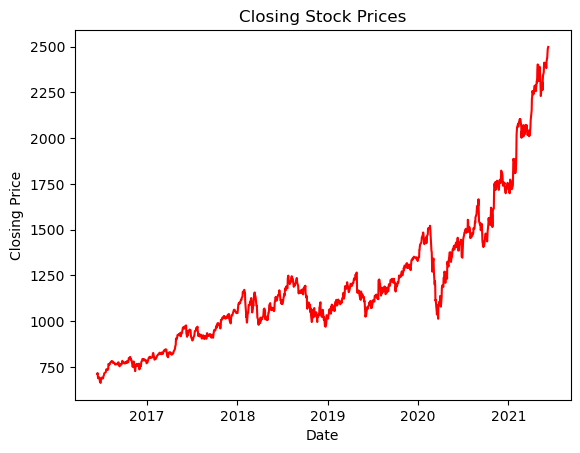

date
2016-06-14     713.1200
2016-06-15     717.3100
2016-06-16     703.2600
2016-06-17     688.4515
2016-06-20     693.4100
                ...    
2021-06-07    2441.0725
2021-06-08    2468.2400
2021-06-09    2487.3300
2021-06-10    2494.0000
2021-06-11    2498.2900
Name: low, Length: 1258, dtype: float64

In [42]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Extract the 'close' prices from df
close = df.iloc[:, 2]  # Assuming 'close' column is the third column (index 2)

# Create a line plot of the 'close' prices
plt.plot(close, color='red')

# Add title and labels
plt.title("Closing Stock Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")

# Show the plot
plt.show()

close

### Task 8: Normalizing Stock Data¶
Normalizing the data to ensure all values are on the same scale. Normalization makes it easier for machine learning algorithms to learn from the data. Let's normalize the closing prices and prepare them for further analysis.

1. Extract the 'close' column values from DataFrame 'df' as 'data' using '.values.reshape(-1, 1)' to create a 2D array for the scaler.
2. Use the 'MinMaxScaler' from the 'sklearn.preprocessing' module to instantiate a scaler object named 'scaler', specifying the feature range as (0, 1).
3. Apply the 'fit_transform()' method on 'data' using the scaler 'scaler' to normalize the 'close' column values, storing the normalized data in 'data_normalized'.

In [43]:
# import MinMaxScaler from sklearn.preprocessing

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Extract the 'close' column values and reshape into a 2D array
data = df['close'].values.reshape(-1, 1)

# Instantiate MinMaxScaler with feature range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data using the scaler
data_normalized = scaler.fit_transform(data)

# 'data_normalized' now contains the normalized 'close' column values

data_normalized

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

### Task 9: Splitting Normalized Data for Training and Testing¶
Splitting the data into training and testing sets. This helps us evaluate our model's performance on unseen data. Let's divide the data into two parts: one for training the model and the other for testing its accuracy.

1. Use 'train_test_split' from 'sklearn.model_selection' to split the 'data_normalized' into training and testing datasets.
2. Specify the 'test_size' parameter as 0.2 to allocate 20% of the data for testing.
3. Set 'shuffle' as 'False' to avoid shuffling the data before splitting.
4. The resulting 'train_data' contains the training dataset obtained after splitting.

In [44]:
#--- Import train_test_split ---

# train_data, test_data = ...

from sklearn.model_selection import train_test_split

# Split the normalized data into training and testing datasets
train_data, test_data = train_test_split(data_normalized, test_size=0.2, shuffle=False)

# train_data now contains the training dataset obtained after splitting

train_data, test_data

(array([[0.02698372],
        [0.02733443],
        [0.02271575],
        ...,
        [0.42512437],
        [0.43035277],
        [0.39689426]]),
 array([[0.40193381],
        [0.40553271],
        [0.4178726 ],
        [0.42240496],
        [0.41422513],
        [0.41193737],
        [0.42280423],
        [0.42957579],
        [0.41207226],
        [0.4171226 ],
        [0.37318571],
        [0.3921083 ],
        [0.40216582],
        [0.41534743],
        [0.42973227],
        [0.44645883],
        [0.44078259],
        [0.4466207 ],
        [0.4547088 ],
        [0.47130046],
        [0.45489764],
        [0.45988324],
        [0.45613865],
        [0.45849116],
        [0.45716922],
        [0.48423927],
        [0.48030043],
        [0.48573386],
        [0.45723936],
        [0.45518361],
        [0.46507387],
        [0.44896241],
        [0.46066021],
        [0.46574832],
        [0.43958475],
        [0.43499304],
        [0.42987795],
        [0.4345398 ],
        [0.448832

### Task 10: LSTM Model Training for Stock Prediction¶
Now, let's build and train an LSTM model to predict stock prices. LSTM models are great for sequence prediction tasks like this. We'll use the training data to train the model and evaluate its performance using various metrics.

First, we'll set up a generator to prepare the data for the LSTM model. Then, we'll define the architecture of the LSTM model, compile it, and train it using the training data.

Once the model is trained, we'll generate predictions for both the training and testing data. After that, we'll calculate evaluation metrics such as mean squared error, mean absolute error, root mean squared error, and R^2 score to assess the model's performance.

Finally, we'll organize the results into a DataFrame and export them as a CSV file for further analysis. Let's train our LSTM model and see how well it performs!

Mean Squared Error (MSE):* MSE calculates the average squared differences between predicted and actual values. It measures the average of the squared differences between predicted and observed values. A lower MSE signifies a model that provides predictions closer to the actual values.

Mean Absolute Error (MAE): MAE computes the average of the absolute differences between predicted and actual values. It represents the average magnitude of errors in predictions, irrespective of their direction. Like MSE, a lower MAE indicates a model with better predictive accuracy.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE, providing a measure of the standard deviation of prediction errors. RMSE is in the same units as the predicted and actual values, making it interpretable and useful for comparing models. As with MSE, lower RMSE values indicate better model performance.

R-squared (R2) Score: R2 measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variable(s) (features). It ranges from 0 to 1, with higher values indicating a better fit of the model to the data. An R2 score of 1 denotes a perfect fit, while a score of 0 indicates that the model does not explain the variability of the target variable.

1. Import necessary libraries, including 'pandas', 'numpy', 'sklearn.metrics', 'tensorflow.keras.models', 'tensorflow.keras.layers', and 'tensorflow.keras.preprocessing.sequence'.

2. Define the time step for the time series data, for example, 'time_step = 100'.

3. Implement a function 'prepare_data' to create a 'TimeseriesGenerator':
a. Use the 'TimeseriesGenerator' class to generate sequences of data for training the LSTM model.
b. The function takes 'data' as input and returns the corresponding generator.
Prepare generators for training and testing data using the 'prepare_data' function:

4. Prepare generators for training and testing data using the 'prepare_data' function:
a. Create 'train_generator' and 'test_generator' by applying the 'prepare_data' function on 'train_data' and 'test_data'.

5. Build the LSTM model using the 'Sequential' API:
a. Add two LSTM layers with 25 units each and a Dense layer with 1 unit.
b. Compile the model using 'adam' optimizer and 'mean_squared_error' loss.

6. Train the model using the 'fit_generator' method on 'train_generator' for a specified number of epochs (e.g., 3).

7. Generate predictions for both training and testing data:
a. Use the trained model to predict sequences for both 'train_generator' and 'test_generator'.

8. Evaluate model performance metrics on training and testing data:
a. Calculate metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2) using 'mean_squared_error', 'mean_absolute_error', 'np.sqrt(mean_squared_error)', and 'r2_score'.

9. Create a DataFrame 'results' to store the calculated metrics for both training and testing data.

10. Export the results DataFrame to a CSV file named 'model_metrics.csv' using 'to_csv' with 'index=False'.

In [45]:
# Import numpy, mean_squared_error, mean_absolute_error, r2_score
# Import tensorflow
# Import Sequential,LSTM, Dense,TimeseriesGenerator

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [46]:
# Define necessary parameters
time_step = 100  # Time step for the time series data

# Function to prepare TimeseriesGenerator
def prepare_data(data):
    generator = TimeseriesGenerator(data, data, length=time_step, batch_size=1)
    return generator

# Prepare generators for train and test data
train_generator = prepare_data(train_data)
test_generator = prepare_data(test_data)

In [47]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(25, input_shape=(time_step, 1), return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=3)

Epoch 1/3
906/906 [==============================] - 16s 16ms/step - loss: 0.0011
Epoch 2/3
906/906 [==============================] - 14s 16ms/step - loss: 4.2245e-04
Epoch 3/3
906/906 [==============================] - 15s 16ms/step - loss: 3.0252e-04


In [48]:
# Generate predictions for train and test data
train_predict = model.predict(train_generator)
test_predict = model.predict(test_generator)

152/152 [==============================] - 0s 3ms/step


In [49]:
# Calculate evaluation metrics for training data
train_mse = mean_squared_error(train_data[time_step:], train_predict)
train_mae = mean_absolute_error(train_data[time_step:], train_predict)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(train_data[time_step:], train_predict)

# Calculate evaluation metrics for testing data
test_mse = mean_squared_error(test_data[time_step:], test_predict)
test_mae = mean_absolute_error(test_data[time_step:], test_predict)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(test_data[time_step:], test_predict)

In [50]:
# Create DataFrame to store metrics
results = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'MSE': [train_mse, test_mse],
    'MAE': [train_mae, test_mae],
    'RMSE': [train_rmse, test_rmse],
    'R2': [train_r2, test_r2]
})

In [51]:
# Export results as CSV('model_metrics.csv' with index=False)
# Export results to CSV
results.to_csv('model_metrics.csv', index=False)